In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from datetime import datetime 
import cv2
from PIL import Image
from keras import backend, optimizers
import glob
from sklearn.model_selection import train_test_split

2023-03-20 12:51:29.335617: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 12:51:29.542679: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-20 12:51:30.250519: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/cudnn-8.4/8.4/lib64:/cm/local/apps/cuda/libs/current/lib64:/cm/shared/apps/cuda11.2/toolkit/11.2.0/targets/x86_64-linux/lib:/cm/local/apps/gcc/7.2.0/lib:/cm/local/apps/gcc/7.2.0/lib64:/hom

In [2]:
!git clone https://github.com/Shankar0x/Datasets.git imgs
from PIL import Image

fatal: destination path 'imgs' already exists and is not an empty directory.


X_train shape:  (200, 192, 256, 3)
Y_train shape:  (200, 192, 256)


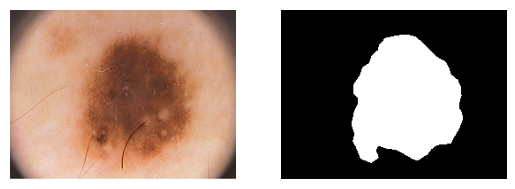

In [3]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts


filelist_trainx = sorted(glob.glob('imgs/Resized_Skin_Lesion_Dataset/Train_images/Trainx/*.bmp'), key=numericalSort)
x_train = np.array([np.array(Image.open(fname)) for fname in filelist_trainx])

filelist_trainy = sorted(glob.glob('imgs/Resized_Skin_Lesion_Dataset/Train_masks/Trainy/*.bmp'), key=numericalSort)
y_train = np.array([np.array(Image.open(fname)) for fname in filelist_trainy])

# filelist_trainx = sorted(glob.glob('imgs/Electron_Microscopy_Dataset/images/*.tif'), key=numericalSort)
# x_train = np.array([np.array(Image.open(fname).convert('RGB')) for fname in filelist_trainx])

# filelist_trainy = sorted(glob.glob('imgs/Electron_Microscopy_Dataset/masks/*.tif'), key=numericalSort)
# y_train = np.array([np.array(Image.open(fname)) for fname in filelist_trainy])

# filelist_trainx = sorted(glob.glob('imgs/Skin_Lesion_Dataset/trainx/*.jpg'), key=numericalSort)
# x_train = np.array([np.array(Image.open(fname).convert('RGB')) for fname in filelist_trainx])

# filelist_trainy = sorted(glob.glob('imgs/Skin_Lesion_Dataset/trainy/*.jpg'), key=numericalSort)
# y_train = np.array([np.array(Image.open(fname)) for fname in filelist_trainy])


print("X_train shape: ",x_train.shape)
print("Y_train shape: ",y_train.shape)
plt.subplot(1,2,1)
plt.imshow(x_train[0].astype('uint8'))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(y_train[0].astype('uint8'),cmap = plt.cm.binary_r)
plt.axis('off')
plt.show()

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.25,random_state=101)

In [5]:
print("X_train shape: ",x_train.shape)
print("Y_train shape: ",y_train.shape)
print("X_test shape: ",x_test.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (150, 192, 256, 3)
Y_train shape:  (150, 192, 256)
X_test shape:  (50, 192, 256, 3)
Y_test shape:  (50, 192, 256)


In [6]:
def random_rotation(x_image, y_image):
    rows_x,cols_x, chl_x = x_image.shape
    rows_y,cols_y = y_image.shape
    rand_num = np.random.randint(-40,40)
    M1 = cv2.getRotationMatrix2D((cols_x/2,rows_x/2),rand_num,1)
    M2 = cv2.getRotationMatrix2D((cols_y/2,rows_y/2),rand_num,1)
    x_image = cv2.warpAffine(x_image,M1,(cols_x,rows_x))
    y_image = cv2.warpAffine(y_image.astype('float32'),M2,(cols_y,rows_y))
    return x_image, y_image.astype('int')

def horizontal_flip(x_image, y_image):
    x_image = cv2.flip(x_image, 1)
    y_image = cv2.flip(y_image.astype('float32'), 1)
    return x_image, y_image.astype('int')

In [7]:
def img_augmentation(x_train, y_train):
    x_rotat = []
    y_rotat = []
    x_flip = []
    y_flip = []
    x_nois = []
    for idx in range(len(x_train)):
        x,y = random_rotation(x_train[idx], y_train[idx])
        x_rotat.append(x)
        y_rotat.append(y)
        
        x,y = horizontal_flip(x_train[idx], y_train[idx])
        x_flip.append(x)
        y_flip.append(y)
        return np.array(x_rotat), np.array(y_rotat), np.array(x_flip), np.array(y_flip)

In [8]:
def img_augmentation(x_test, y_test):
    x_rotat = []
    y_rotat = []
    x_flip = []
    y_flip = []
    x_nois = []
    for idx in range(len(x_test)):
        x,y = random_rotation(x_test[idx], y_test[idx])
        x_rotat.append(x)
        y_rotat.append(y)
        
        x,y = horizontal_flip(x_test[idx], y_test[idx])
        x_flip.append(x)
        y_flip.append(y)

    return np.array(x_rotat), np.array(y_rotat), np.array(x_flip), np.array(y_flip)

In [9]:
x_rotated, y_rotated, x_flipped, y_flipped = img_augmentation(x_train, y_train)
x_rotated_t, y_rotated_t, x_flipped_t, y_flipped_t = img_augmentation(x_test, y_test)

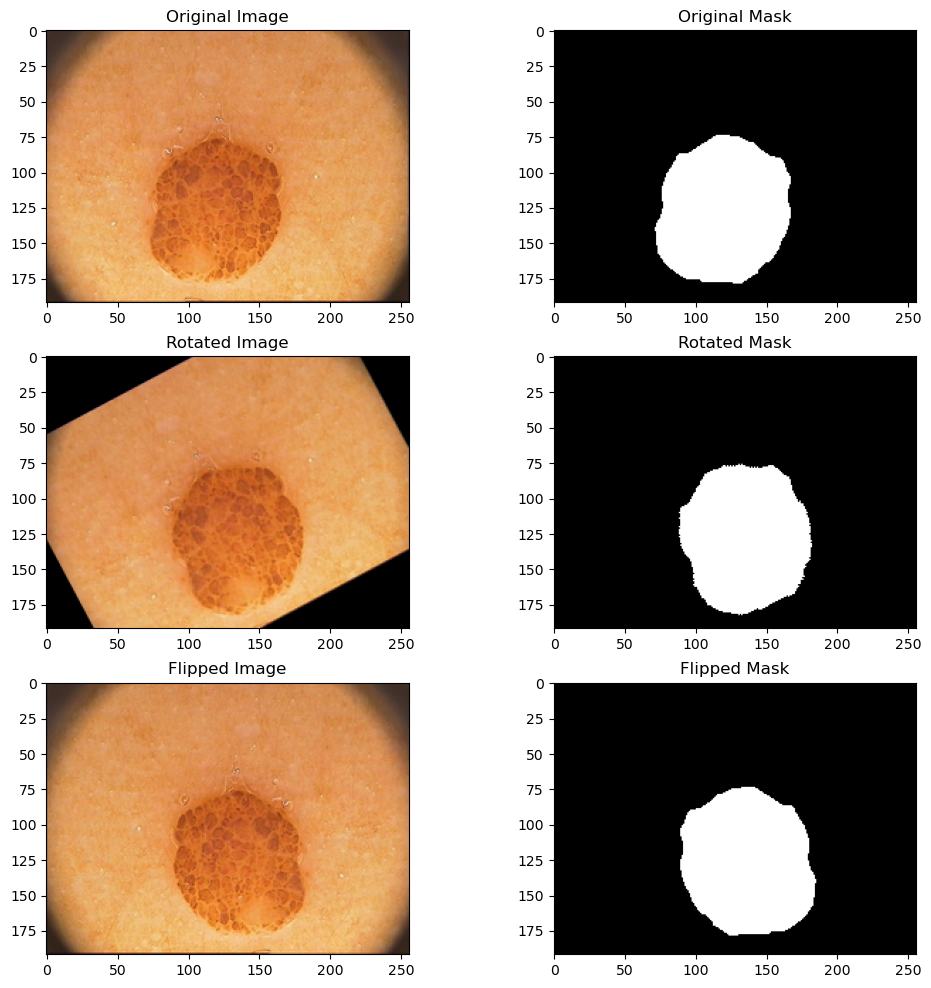

In [10]:
img_num = 114
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.imshow(x_train[img_num])
plt.title('Original Image')
plt.subplot(3,2,2)
plt.imshow(y_train[img_num], plt.cm.binary_r)
plt.title('Original Mask')
plt.subplot(3,2,3)
plt.imshow(x_rotated[img_num])
plt.title('Rotated Image')
plt.subplot(3,2,4)
plt.imshow(y_rotated[img_num], plt.cm.binary_r)
plt.title('Rotated Mask')
plt.subplot(3,2,5)
plt.imshow(x_flipped[img_num])
plt.title('Flipped Image')
plt.subplot(3,2,6)
plt.imshow(y_flipped[img_num], plt.cm.binary_r)
plt.title('Flipped Mask')
plt.show()

In [11]:
x_train_full = np.concatenate([x_train, x_rotated, x_flipped])
y_train_full = np.concatenate([y_train, y_rotated, y_flipped])

In [12]:
y_train_full.shape

(450, 192, 256)

In [13]:
# expanding dimensions of the masks
y_train_full_exp = np.zeros((y_train_full.shape[0], y_train_full.shape[1], y_train_full.shape[2],1))
for i in range(y_train_full.shape[0]):
    y_train_full_exp[i] = np.expand_dims(y_train_full[i], 2)

y_test_exp = np.zeros((y_test.shape[0], y_test.shape[1], y_test.shape[2], 1))
for i in range(y_test.shape[0]):
    y_test_exp[i] = np.expand_dims(y_test[i],2)

In [14]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full_exp, test_size = 0.20, random_state = 101)

In [15]:
y_test = y_test_exp
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test_exp.shape)
print(x_val.shape)
print(y_val.shape)

(360, 192, 256, 3)
(360, 192, 256, 1)
(50, 192, 256, 3)
(50, 192, 256, 1)
(90, 192, 256, 3)
(90, 192, 256, 1)


### Old code

In [16]:
# image_directory = 'imgs/Resized_Skin_Lesion_Dataset/Train_images/Trainx/'
# mask_directory = 'imgs/Resized_Skin_Lesion_Dataset/Train_masks/Trainy/'

In [17]:
# SIZE = 256
# image_dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
# mask_dataset = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

# images = sorted(os.listdir(image_directory))
# for i, image_name in enumerate(images):    #Remember enumerate method adds a counter and returns the enumerate object
#     if (image_name.split('.')[1] == 'bmp'):
#         #print(image_directory+image_name)
#         image = cv2.imread(image_directory+image_name, 1)
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB )
#         image = Image.fromarray(image)
#         image = image.resize((SIZE, SIZE))
#         image_dataset.append(np.array(image))

In [18]:
# masks = sorted(os.listdir(mask_directory))
# for i, image_name in enumerate(masks):
#     if (image_name.split('.')[1] == 'bmp'):
#         image = cv2.imread(mask_directory+image_name, 0)
#         image = Image.fromarray(image)
#         image = image.resize((SIZE, SIZE))
#         mask_dataset.append(np.array(image))

In [19]:
# #Normalize images
# image_dataset = np.array(image_dataset)/255.
# #D not normalize masks, just rescale to 0 to 1.
# mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.

In [20]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.10, random_state = 0)

In [21]:
# X_train.shape

In [22]:
# y_train.shape

In [23]:
# import random
# import numpy as np
# image_number = random.randint(0, len(X_train))
# plt.figure(figsize=(12, 6))
# plt.subplot(121)
# plt.imshow(np.reshape(X_train[image_number], (256, 256, 3)))
# plt.subplot(122)
# plt.imshow(np.reshape(y_train[image_number], (256, 256)), cmap='gray')
# plt.show()

In [24]:
# !pip install focal-loss

In [25]:
IMG_HEIGHT = x_train.shape[1]
IMG_WIDTH  = x_train.shape[2]
IMG_CHANNELS = x_train.shape[3]
num_labels = 1  #Binary
input_shape = (IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS)
batch_size = 8

#FOCAL LOSS AND DICE METRIC
#Focal loss helps focus more on tough to segment classes.
from focal_loss import BinaryFocalLoss

In [26]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras import backend as K
from keras.models import Model

In [27]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2.0 * intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1.0)


def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)


def jacard_coef_loss(y_true, y_pred):
    return -jacard_coef(y_true, y_pred)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [28]:
def repeat_elem(tensor, rep):
    # lambda function to repeat Repeats the elements of a tensor along an axis
    #by a factor of rep.
    # If tensor has shape (None, 256,256,3), lambda will return a tensor of shape 
    #(None, 256,256,6), if specified axis=3 and rep=2.

     return layers.Lambda(lambda x, repnum: K.repeat_elements(x, repnum, axis=3),
                          arguments={'repnum': rep})(tensor)


def res_conv_block_2(x, filter_size, size, dropout, batch_norm=False):


    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(x)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation('relu')(conv)
    
    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(conv)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    #conv = layers.Activation('relu')(conv)    #Activation before addition with shortcut
    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    shortcut = layers.Conv2D(size, kernel_size=(1, 1), padding='same')(x)
    if batch_norm is True:
        shortcut = layers.BatchNormalization(axis=3)(shortcut)

    res_path = layers.add([shortcut, conv])
    res_path = layers.Activation('relu')(res_path)    #Activation after addition with shortcut (Original residual block)
    return res_path

def res_conv_block_3(x, filter_size, size, dropout, batch_norm=False):

    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(x)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation('relu')(conv)
    
    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(conv)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation('relu')(conv)
    
    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(conv)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    #conv = layers.Activation('relu')(conv)    #Activation before addition with shortcut
    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    shortcut = layers.Conv2D(size, kernel_size=(1, 1), padding='same')(x)
    if batch_norm is True:
        shortcut = layers.BatchNormalization(axis=3)(shortcut)

    res_path = layers.add([shortcut, conv])
    res_path = layers.Activation('relu')(res_path)
    return res_path

In [29]:
def ressegnet(input_shape, NUM_CLASSES=1, dropout_rate=0.0, batch_norm=True):
    '''
    Residual segnet
    
    '''
    # network structure
    FILTER_NUM = 64 # number of basic filters for the first layer
    FILTER_SIZE = 3 # size of the convolutional filter
    UP_SAMP_SIZE = 2 # size of upsampling filters
    # input data
    # dimension of the image depth
    inputs = layers.Input(input_shape, dtype=tf.float32)
    
    axis = 3

    # Downsampling layers
    # DownRes 1, double residual convolution + pooling
    conv_64 = res_conv_block_2(inputs, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64 = layers.MaxPooling2D(pool_size=(2,2))(conv_64)
    # DownRes 2
    conv_128 = res_conv_block_2(pool_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_128 = layers.MaxPooling2D(pool_size=(2,2))(conv_128)
    # DownRes 3
    conv_256 = res_conv_block_3(pool_128, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_256 = layers.MaxPooling2D(pool_size=(2,2))(conv_256)
    # DownRes 4
    conv_512_1 = res_conv_block_3(pool_256, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_512_1 = layers.MaxPooling2D(pool_size=(2,2))(conv_512_1)
    # DownRes 5
    conv_512_2 = res_conv_block_3(pool_512_1, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_512_2 = layers.MaxPooling2D(pool_size=(2,2))(conv_512_2)
    # DownRes 6, convolution only
    bridge = res_conv_block_2(pool_512_2, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    # Upsampling layers
    # UpRes 7, attention gated concatenation + upsampling + double residual convolution
#     gating_512_2 = gating_signal(bridge, 8*FILTER_NUM, batch_norm)
#     att_512_2 = attention_block(conv_512_2, gating_512_2, 8*FILTER_NUM)
    up_512_2 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(bridge)
    up_512_2 = layers.concatenate([up_512_2, conv_512_2], axis=axis)
    up_conv_512_2 = res_conv_block_3(up_512_2, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 8
#     gating_512_1 = gating_signal(up_conv_512_2, 8*FILTER_NUM, batch_norm)
#     att_512_1 = attention_block(conv_512_1, gating_512_1, 8*FILTER_NUM)
    up_512_1 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_512_2)
    up_512_1 = layers.concatenate([up_512_1, conv_512_1], axis=axis)
    up_conv_512_1 = res_conv_block_3(up_512_1, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 9
#     gating_256 = gating_signal(up_conv_512_1, 4*FILTER_NUM, batch_norm)
#     att_256 = attention_block(conv_256, gating_256, 4*FILTER_NUM)
    up_256 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_512_1)
    up_256 = layers.concatenate([up_256, conv_256], axis=axis)
    up_conv_256 = res_conv_block_3(up_256, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 10
#     gating_128 = gating_signal(up_conv_256, 2*FILTER_NUM, batch_norm)
#     att_128 = attention_block(conv_128, gating_128, 2*FILTER_NUM)
    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_256)
    up_128 = layers.concatenate([up_128, conv_128], axis=axis)
    up_conv_128 = res_conv_block_2(up_128, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 9
#     gating_64 = gating_signal(up_conv_128, FILTER_NUM, batch_norm)
#     att_64 = attention_block(conv_64, gating_64, FILTER_NUM)
    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_128)
    up_64 = layers.concatenate([up_64, conv_64], axis=axis)
    up_conv_64 = res_conv_block_2(up_64, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    # 1*1 convolutional layers
    
    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_64)
    conv_final = layers.BatchNormalization(axis=axis)(conv_final)
    conv_final = layers.Activation('sigmoid')(conv_final)  #Change to softmax for multichannel

    # Model integration
    model = models.Model(inputs, conv_final, name="ressegnet")
    return model, inputs, conv_512_2, conv_512_1, conv_256, conv_128, conv_64

In [30]:
ressegnet_model, input_inter, pool_512_2, pool_512_1, pool_256, pool_128, pool_64 = ressegnet(input_shape)

ressegnet_model.compile(optimizer=Adam(lr = 1e-2), loss=BinaryFocalLoss(gamma=2), 
              metrics=['accuracy', jacard_coef])

print(ressegnet_model.summary())


start3 = datetime.now() 
ressegnet_history = ressegnet_model.fit(x_train, y_train, 
                    verbose=1,
                    batch_size = batch_size,
                    validation_data=(x_test, y_test ), 
                    shuffle=False,
                    epochs=100)
stop3 = datetime.now()

#Execution time of the model 
execution_time_ressegnet = stop3-start3
print("Residual segnet execution time is: ", execution_time_ressegnet)

ressegnet_model.save('skin_residual_150epochs_B_focal.hdf5')


2023-03-20 12:53:08.213556: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 12:53:09.051431: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14625 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0000:3b:00.0, compute capability: 7.0


Model: "ressegnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 192, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 192, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 192, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                         

 rmalization)                                                                                     
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 48, 64, 256)  1024       ['conv2d_8[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 add_2 (Add)                    (None, 48, 64, 256)  0           ['batch_normalization_9[0][0]',  
                                                                  'batch_normalization_8[0][0]']  
                                                                                                  
 activation_6 (Activation)      (None, 48, 64, 256)  0           ['add_2[0][0]']                  
                                                                                                  
 max_pooli

 conv2d_19 (Conv2D)             (None, 6, 8, 1024)   9438208     ['activation_13[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 6, 8, 1024)  4096        ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_19 (BatchN  (None, 6, 8, 1024)  4096        ['conv2d_19[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 add_5 (Add)                    (None, 6, 8, 1024)   0           ['batch_normalization_20[0][0]', 
                                                                  'batch_normalization_19[0][0]'] 
          

/home/ok_sikha/anaconda3/envs/tf_gpu_segnet/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


 activation_18 (Activation)     (None, 24, 32, 512)  0           ['batch_normalization_25[0][0]'] 
                                                                                                  
 conv2d_26 (Conv2D)             (None, 24, 32, 512)  2359808     ['activation_18[0][0]']          
                                                                                                  
 batch_normalization_26 (BatchN  (None, 24, 32, 512)  2048       ['conv2d_26[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_19 (Activation)     (None, 24, 32, 512)  0           ['batch_normalization_26[0][0]'] 
                                                                                                  
 conv2d_28 (Conv2D)             (None, 24, 32, 512)  524800      ['concatenate_1[0][0]']          
          

 ormalization)                  )                                                                 
                                                                                                  
 add_9 (Add)                    (None, 96, 128, 128  0           ['batch_normalization_35[0][0]', 
                                )                                 'batch_normalization_34[0][0]'] 
                                                                                                  
 activation_25 (Activation)     (None, 96, 128, 128  0           ['add_9[0][0]']                  
                                )                                                                 
                                                                                                  
 up_sampling2d_4 (UpSampling2D)  (None, 192, 256, 12  0          ['activation_25[0][0]']          
                                8)                                                                
          

2023-03-20 12:53:17.366255: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


45/45 [==============================] - 21s 230ms/step - loss: 0.0968 - accuracy: 0.8638 - jacard_coef: 0.3759 - val_loss: 7.3660 - val_accuracy: 0.5430 - val_jacard_coef: 0.0537
Epoch 2/100
45/45 [==============================] - 8s 185ms/step - loss: 0.0701 - accuracy: 0.8985 - jacard_coef: 0.4071 - val_loss: 3.9383 - val_accuracy: 0.6621 - val_jacard_coef: 0.0548
Epoch 3/100
45/45 [==============================] - 8s 185ms/step - loss: 0.0686 - accuracy: 0.8970 - jacard_coef: 0.4163 - val_loss: 10.9755 - val_accuracy: 0.3139 - val_jacard_coef: 0.2932
Epoch 4/100
45/45 [==============================] - 8s 185ms/step - loss: 0.0678 - accuracy: 0.8982 - jacard_coef: 0.4220 - val_loss: 5.8545 - val_accuracy: 0.4950 - val_jacard_coef: 0.3494
Epoch 5/100
45/45 [==============================] - 8s 185ms/step - loss: 0.0628 - accuracy: 0.9040 - jacard_coef: 0.4342 - val_loss: 0.4067 - val_accuracy: 0.8339 - val_jacard_coef: 0.5539
Epoch 6/100
45/45 [==============================] - 8s

Epoch 44/100
45/45 [==============================] - 8s 187ms/step - loss: 0.0122 - accuracy: 0.9818 - jacard_coef: 0.7427 - val_loss: 0.1000 - val_accuracy: 0.9310 - val_jacard_coef: 0.6392
Epoch 45/100
45/45 [==============================] - 8s 188ms/step - loss: 0.0154 - accuracy: 0.9768 - jacard_coef: 0.7221 - val_loss: 0.0729 - val_accuracy: 0.9448 - val_jacard_coef: 0.6390
Epoch 46/100
45/45 [==============================] - 8s 186ms/step - loss: 0.0124 - accuracy: 0.9809 - jacard_coef: 0.7419 - val_loss: 0.1188 - val_accuracy: 0.9350 - val_jacard_coef: 0.6449
Epoch 47/100
45/45 [==============================] - 8s 186ms/step - loss: 0.0113 - accuracy: 0.9825 - jacard_coef: 0.7529 - val_loss: 0.0655 - val_accuracy: 0.9419 - val_jacard_coef: 0.6484
Epoch 48/100
45/45 [==============================] - 8s 186ms/step - loss: 0.0148 - accuracy: 0.9782 - jacard_coef: 0.7399 - val_loss: 0.0900 - val_accuracy: 0.9371 - val_jacard_coef: 0.6756
Epoch 49/100
45/45 [====================

Epoch 87/100
45/45 [==============================] - 8s 185ms/step - loss: 0.0077 - accuracy: 0.9878 - jacard_coef: 0.8183 - val_loss: 0.0737 - val_accuracy: 0.9544 - val_jacard_coef: 0.7264
Epoch 88/100
45/45 [==============================] - 8s 185ms/step - loss: 0.0074 - accuracy: 0.9882 - jacard_coef: 0.8192 - val_loss: 0.0894 - val_accuracy: 0.9474 - val_jacard_coef: 0.7217
Epoch 89/100
45/45 [==============================] - 8s 186ms/step - loss: 0.0072 - accuracy: 0.9886 - jacard_coef: 0.8216 - val_loss: 0.1115 - val_accuracy: 0.9394 - val_jacard_coef: 0.6993
Epoch 90/100
45/45 [==============================] - 8s 186ms/step - loss: 0.0073 - accuracy: 0.9885 - jacard_coef: 0.8208 - val_loss: 0.1168 - val_accuracy: 0.9396 - val_jacard_coef: 0.7150
Epoch 91/100
45/45 [==============================] - 8s 187ms/step - loss: 0.0071 - accuracy: 0.9887 - jacard_coef: 0.8231 - val_loss: 0.0660 - val_accuracy: 0.9548 - val_jacard_coef: 0.7367
Epoch 92/100
45/45 [====================

In [47]:
# # model = att_res_SegNet_model
# # skin_AttResSegNet_150epochs_B_focal.hdf5
# model_path = "SegNet_Weights/Skin_Attention_Residual_Segnet_150_epochs_95.9%.hdf5"
# model = tf.keras.models.load_model(model_path, compile=False)

In [31]:
import pandas as pd    
ressegnet_history_df = pd.DataFrame(ressegnet_history.history) 

with open('custom_code_att_res_SegNet_history_df.csv', mode='w') as f:
    ressegnet_history_df.to_csv(f) 

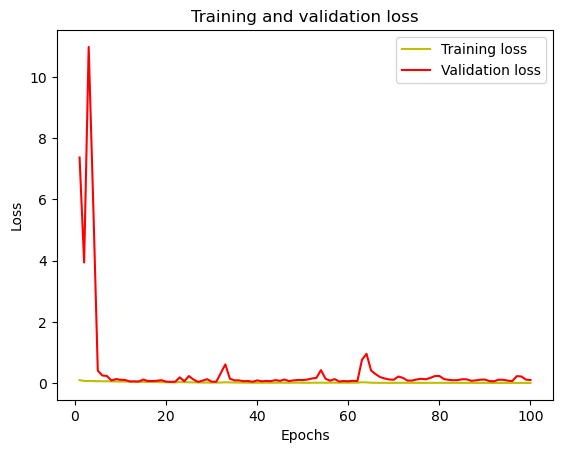

In [32]:
history = ressegnet_history

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

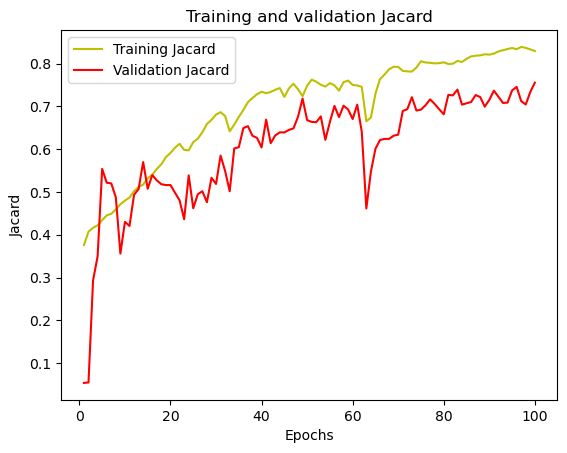

In [33]:
acc = history.history['jacard_coef']
#acc = history.history['accuracy']
val_acc = history.history['val_jacard_coef']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Jacard')
plt.plot(epochs, val_acc, 'r', label='Validation Jacard')
plt.title('Training and validation Jacard')
plt.xlabel('Epochs')
plt.ylabel('Jacard')
plt.legend()
plt.show()

1/1 [==============================] - 2s 2s/step


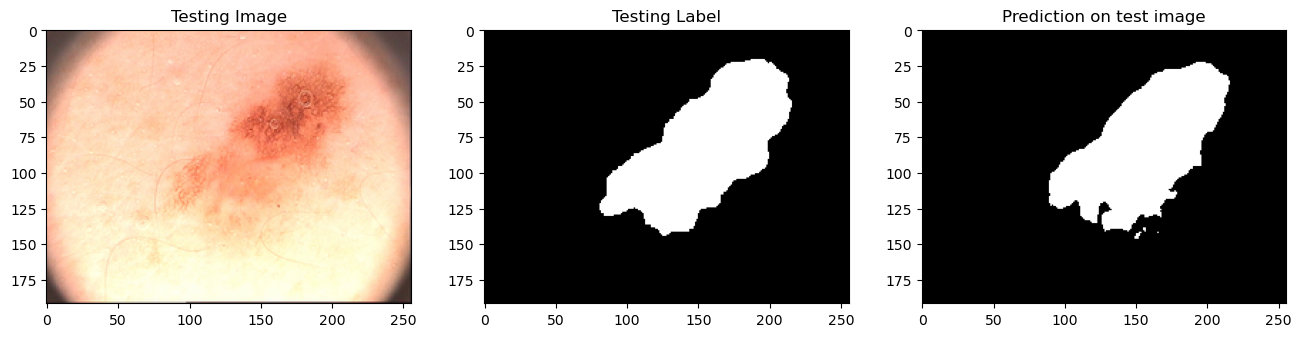

In [34]:
model = ressegnet_model

import random
test_img_number = random.randint(0, x_test.shape[0]-1)
test_img = x_test[test_img_number]
ground_truth=y_test[test_img_number]

test_img_input=np.expand_dims(test_img, 0)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img, cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()

In [35]:
from tensorflow.keras.metrics import MeanIoU
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(ground_truth[:,:,0], prediction)
print("IoU for the above prediction =", IOU_keras.result().numpy())

IoU for the above prediction = 0.9193264


In [36]:
sum_iou=0
for test_img_number in range(x_train_full.shape[0]):
    test_img = x_train_full[test_img_number]
    ground_truth=y_train_full_exp[test_img_number]

    test_img_input=np.expand_dims(test_img, 0)
    prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
    
    IOU_keras = MeanIoU(num_classes=n_classes)  
    IOU_keras.update_state(ground_truth[:,:,0], prediction)
    sum_iou+=IOU_keras.result().numpy()*100
    print("IoU for the current prediction =", IOU_keras.result().numpy())
print("Mean IoU: ",sum_iou/x_train_full.shape[0])

1/1 [==============================] - 0s 70ms/step
IoU for the current prediction = 0.89918077
1/1 [==============================] - 0s 60ms/step
IoU for the current prediction = 0.9774183
1/1 [==============================] - 0s 38ms/step
IoU for the current prediction = 0.93841934
1/1 [==============================] - 0s 52ms/step
IoU for the current prediction = 0.9703683
1/1 [==============================] - 0s 51ms/step
IoU for the current prediction = 0.9587902
1/1 [==============================] - 0s 70ms/step
IoU for the current prediction = 0.9758165
1/1 [==============================] - 0s 60ms/step
IoU for the current prediction = 0.9322692
1/1 [==============================] - 0s 53ms/step
IoU for the current prediction = 0.97824275
1/1 [==============================] - 0s 57ms/step
IoU for the current prediction = 0.90213704
1/1 [==============================] - 0s 57ms/step
IoU for the current prediction = 0.9656912
1/1 [==============================] - 0s 46ms

1/1 [==============================] - 0s 43ms/step
IoU for the current prediction = 0.96111
1/1 [==============================] - 0s 51ms/step
IoU for the current prediction = 0.9463461
1/1 [==============================] - 0s 57ms/step
IoU for the current prediction = 0.96012366
1/1 [==============================] - 0s 67ms/step
IoU for the current prediction = 0.9410633
1/1 [==============================] - 0s 56ms/step
IoU for the current prediction = 0.90276814
1/1 [==============================] - 0s 55ms/step
IoU for the current prediction = 0.80927527
1/1 [==============================] - 0s 48ms/step
IoU for the current prediction = 0.8726562
1/1 [==============================] - 0s 40ms/step
IoU for the current prediction = 0.97666085
1/1 [==============================] - 0s 52ms/step
IoU for the current prediction = 0.92235196
1/1 [==============================] - 0s 52ms/step
IoU for the current prediction = 0.6754525
1/1 [==============================] - 0s 52ms/

1/1 [==============================] - 0s 44ms/step
IoU for the current prediction = 0.89374006
1/1 [==============================] - 0s 67ms/step
IoU for the current prediction = 0.96990466
1/1 [==============================] - 0s 48ms/step
IoU for the current prediction = 0.94405144
1/1 [==============================] - 0s 70ms/step
IoU for the current prediction = 0.9401109
1/1 [==============================] - 0s 33ms/step
IoU for the current prediction = 0.9546422
1/1 [==============================] - 0s 52ms/step
IoU for the current prediction = 0.95081496
1/1 [==============================] - 0s 72ms/step
IoU for the current prediction = 0.95702076
1/1 [==============================] - 0s 47ms/step
IoU for the current prediction = 0.95920753
1/1 [==============================] - 0s 54ms/step
IoU for the current prediction = 0.9477805
1/1 [==============================] - 0s 32ms/step
IoU for the current prediction = 0.90066135
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 46ms/step
IoU for the current prediction = 0.9637489
1/1 [==============================] - 0s 44ms/step
IoU for the current prediction = 0.79358613
1/1 [==============================] - 0s 43ms/step
IoU for the current prediction = 0.93207425
1/1 [==============================] - 0s 36ms/step
IoU for the current prediction = 0.9661171
1/1 [==============================] - 0s 50ms/step
IoU for the current prediction = 0.94545907
1/1 [==============================] - 0s 46ms/step
IoU for the current prediction = 0.9440105
1/1 [==============================] - 0s 61ms/step
IoU for the current prediction = 0.94490844
1/1 [==============================] - 0s 49ms/step
IoU for the current prediction = 0.946905
1/1 [==============================] - 0s 59ms/step
IoU for the current prediction = 0.96242976
1/1 [==============================] - 0s 48ms/step
IoU for the current prediction = 0.93488574
1/1 [==============================] - 0s 48m

1/1 [==============================] - 0s 54ms/step
IoU for the current prediction = 0.9673717
1/1 [==============================] - 0s 59ms/step
IoU for the current prediction = 0.9679158
1/1 [==============================] - 0s 51ms/step
IoU for the current prediction = 0.92617226
1/1 [==============================] - 0s 46ms/step
IoU for the current prediction = 0.9613215
1/1 [==============================] - 0s 51ms/step
IoU for the current prediction = 0.90222645
1/1 [==============================] - 0s 47ms/step
IoU for the current prediction = 0.9609018
1/1 [==============================] - 0s 55ms/step
IoU for the current prediction = 0.95828986
1/1 [==============================] - 0s 53ms/step
IoU for the current prediction = 0.97592926
1/1 [==============================] - 0s 52ms/step
IoU for the current prediction = 0.9279976
1/1 [==============================] - 0s 53ms/step
IoU for the current prediction = 0.93329436
1/1 [==============================] - 0s 54m

1/1 [==============================] - 0s 49ms/step
IoU for the current prediction = 0.9655596
1/1 [==============================] - 0s 54ms/step
IoU for the current prediction = 0.9147997
1/1 [==============================] - 0s 45ms/step
IoU for the current prediction = 0.94113386
1/1 [==============================] - 0s 62ms/step
IoU for the current prediction = 0.96731174
1/1 [==============================] - 0s 44ms/step
IoU for the current prediction = 0.9371043
1/1 [==============================] - 0s 43ms/step
IoU for the current prediction = 0.87043273
1/1 [==============================] - 0s 61ms/step
IoU for the current prediction = 0.9579929
1/1 [==============================] - 0s 43ms/step
IoU for the current prediction = 0.94722927
1/1 [==============================] - 0s 52ms/step
IoU for the current prediction = 0.9462576
1/1 [==============================] - 0s 68ms/step
IoU for the current prediction = 0.9178066
1/1 [==============================] - 0s 45ms

### Interpretability

In [37]:
def visualize_conv_layer(int_out, row_size, col_size):
   
  img_index=0

  print(np.shape(int_out))
  
  fig,ax=plt.subplots(row_size,col_size, figsize=(20, 20))
  for row in range(0,row_size):
    for col in range(0,col_size):
      ax[row][col].imshow(int_out[0, :, :, img_index], cmap='jet')
      ax[row][col].axis('off')
      img_index=img_index+1
        
print("Function to Visualize the Output has been Created")

Function to Visualize the Output has been Created


Convolutional block 1
1/1 [==============================] - 0s 402ms/step
(1, 12, 16, 512)


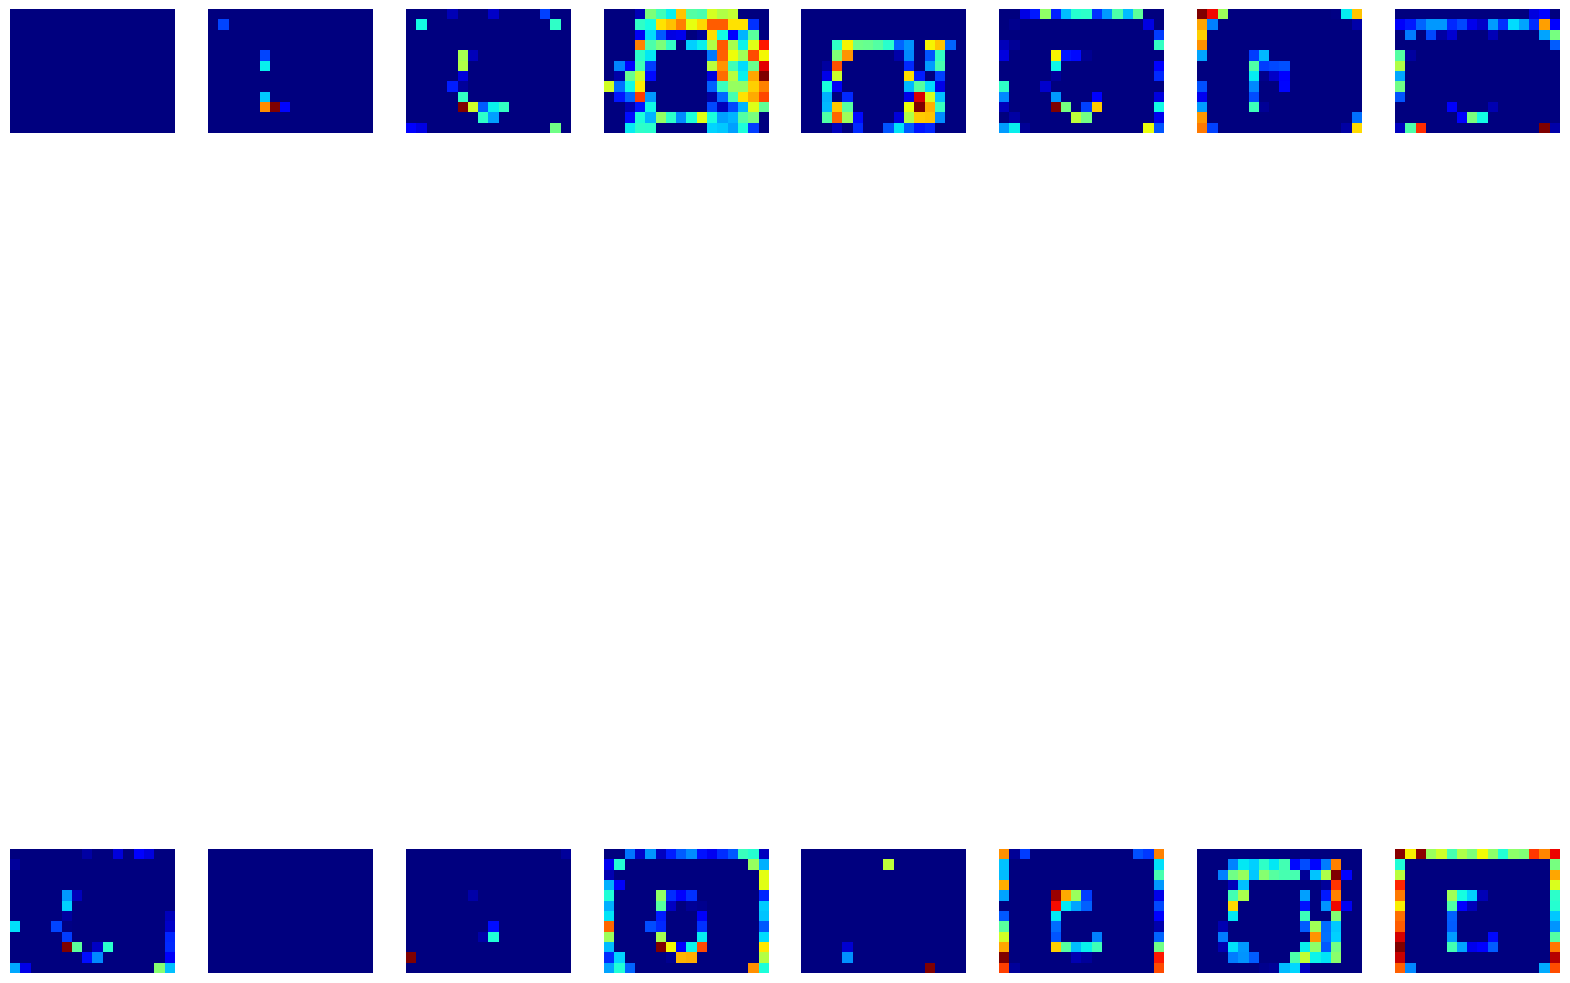

In [38]:
attention_blocks = [pool_512_2, pool_512_1, pool_256, pool_128, pool_64]
print("Convolutional block 1")
in_to_intermediate = Model(inputs=input_inter, outputs=attention_blocks[0])
int_out = in_to_intermediate.predict(test_img_input)
visualize_conv_layer(int_out,2,8)

Convolutional block 2
1/1 [==============================] - 0s 320ms/step
(1, 24, 32, 512)


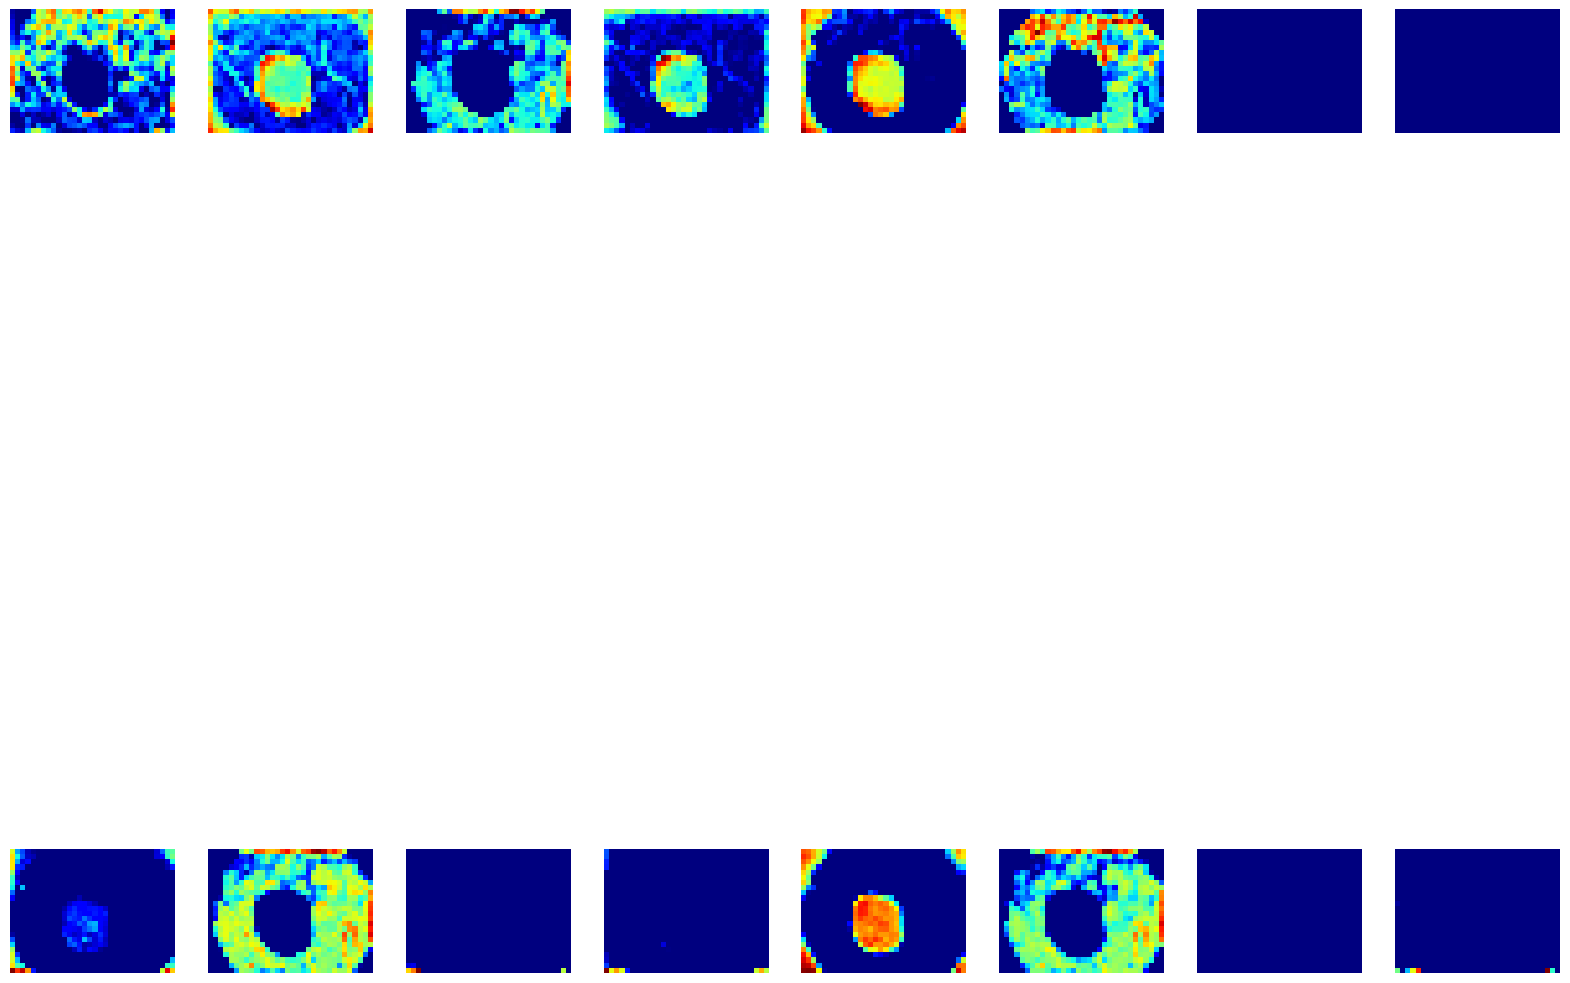

In [39]:
print("Convolutional block 2")
in_to_intermediate = Model(inputs=input_inter, outputs=attention_blocks[1])
int_out = in_to_intermediate.predict(test_img_input)
visualize_conv_layer(int_out,2 ,8)

Convolutional block 3
1/1 [==============================] - 0s 219ms/step
(1, 48, 64, 256)


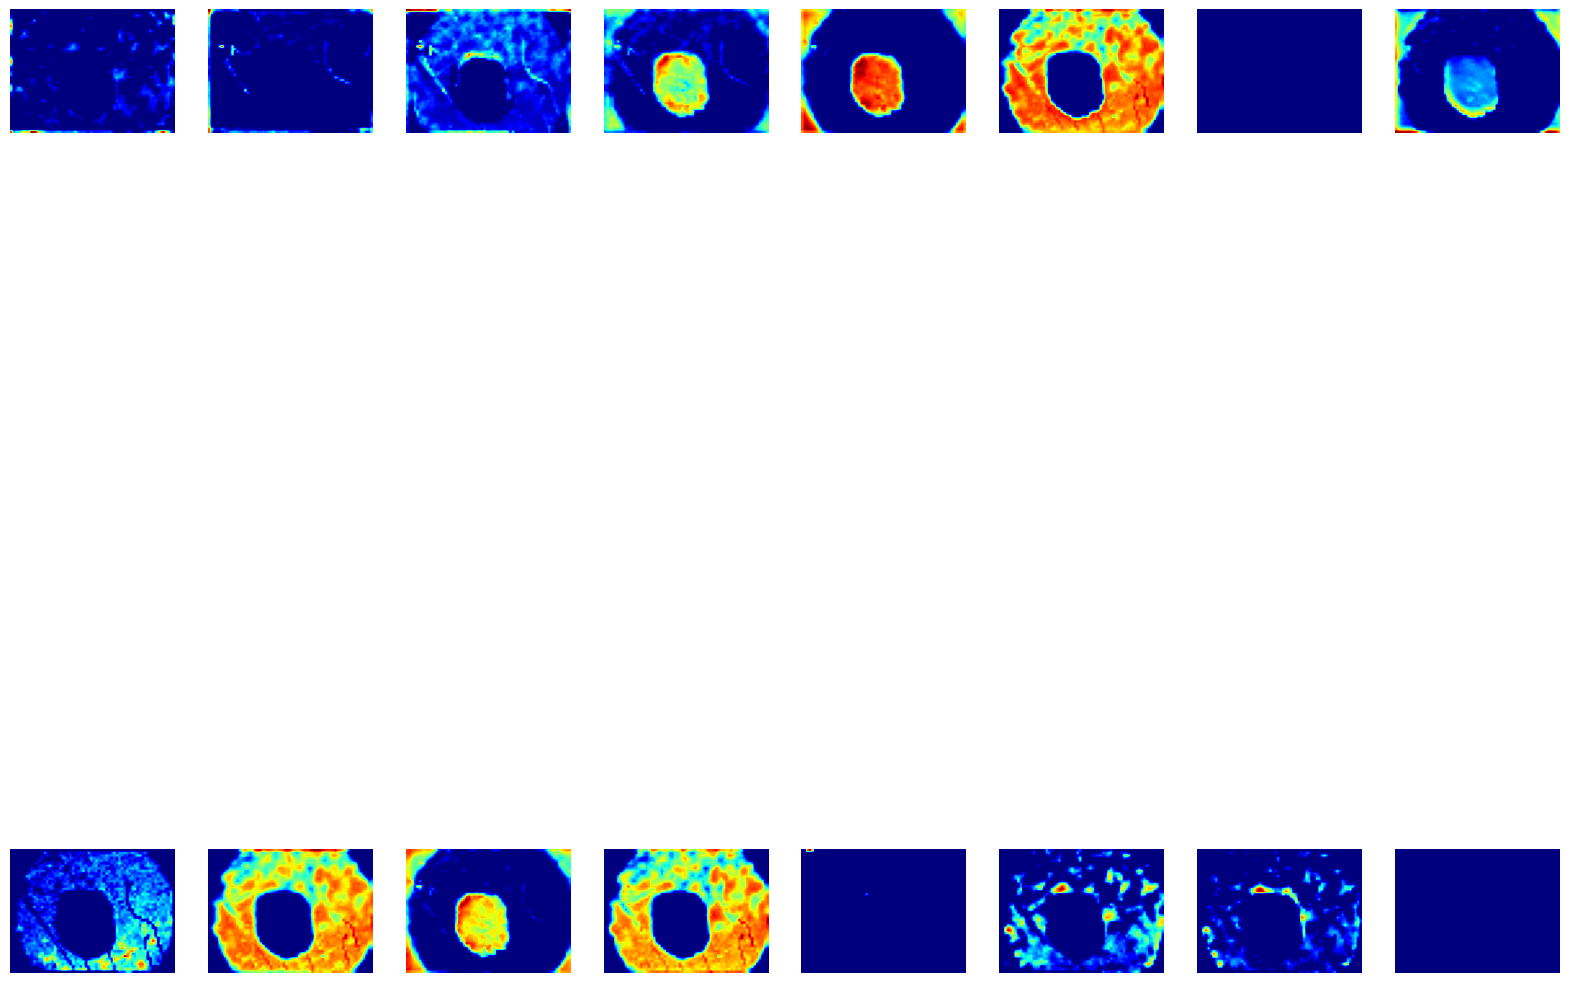

In [40]:
print("Convolutional block 3")
in_to_intermediate = Model(inputs=input_inter, outputs=attention_blocks[2])
int_out = in_to_intermediate.predict(test_img_input)
visualize_conv_layer(int_out,2,8)

Convolutional block 4
1/1 [==============================] - 0s 152ms/step
(1, 96, 128, 128)


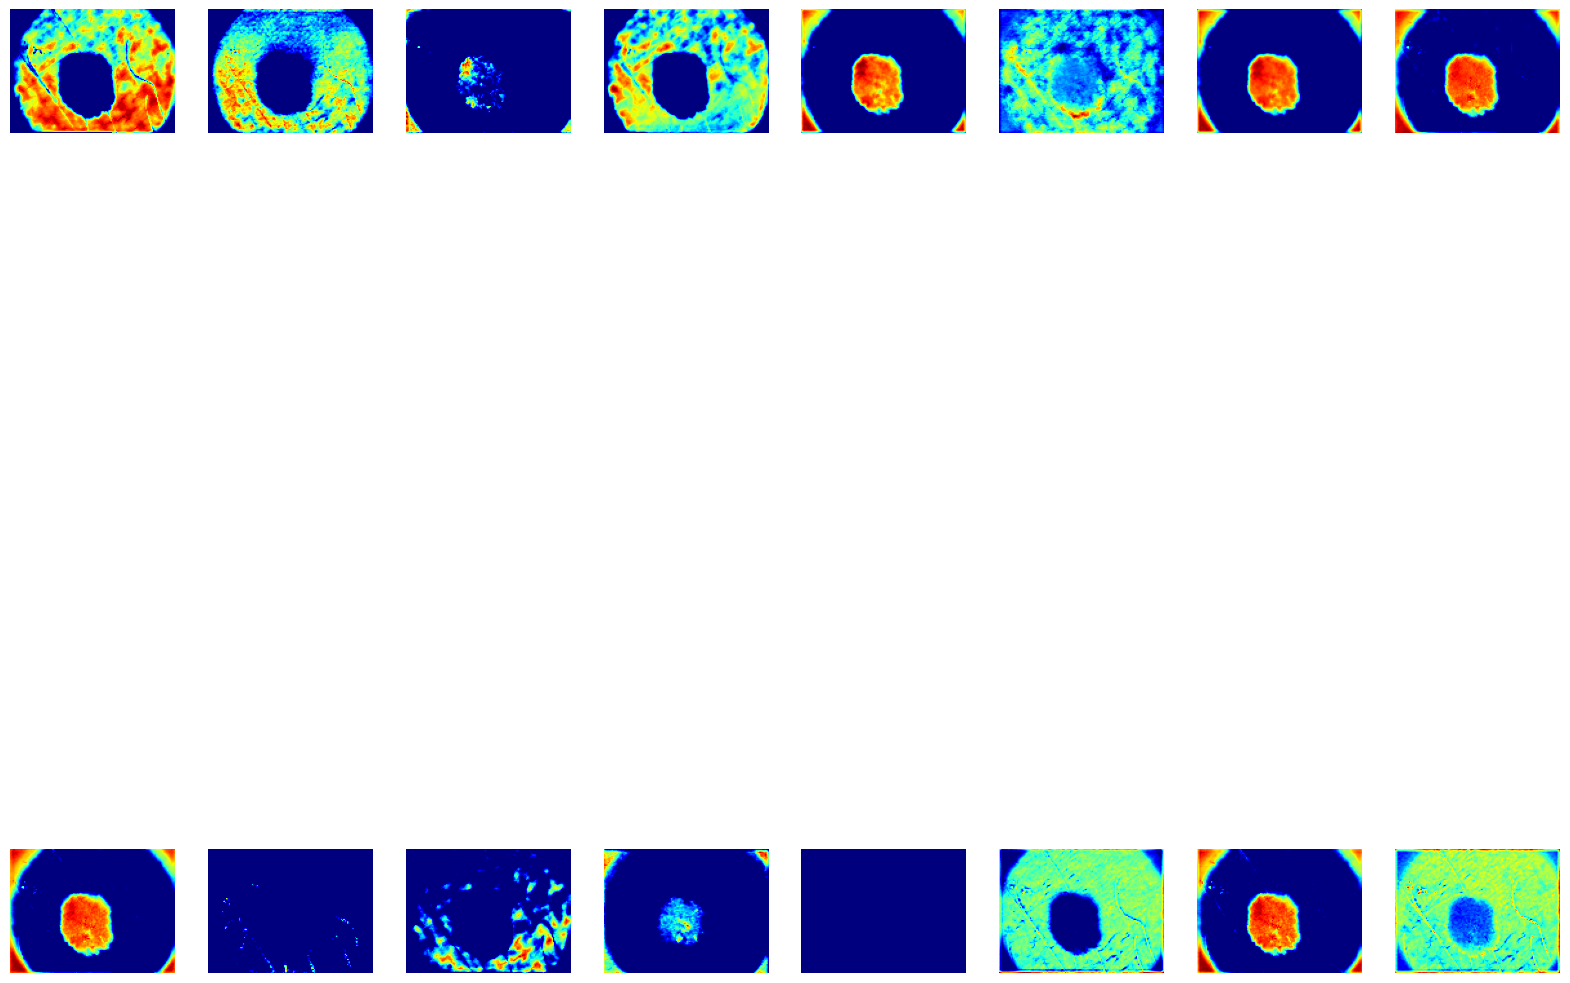

In [41]:
print("Convolutional block 4")
in_to_intermediate = Model(inputs=input_inter, outputs=attention_blocks[3])
int_out = in_to_intermediate.predict(test_img_input)
visualize_conv_layer(int_out,2,8)

Convolutional block 5
1/1 [==============================] - 0s 130ms/step
(1, 192, 256, 64)


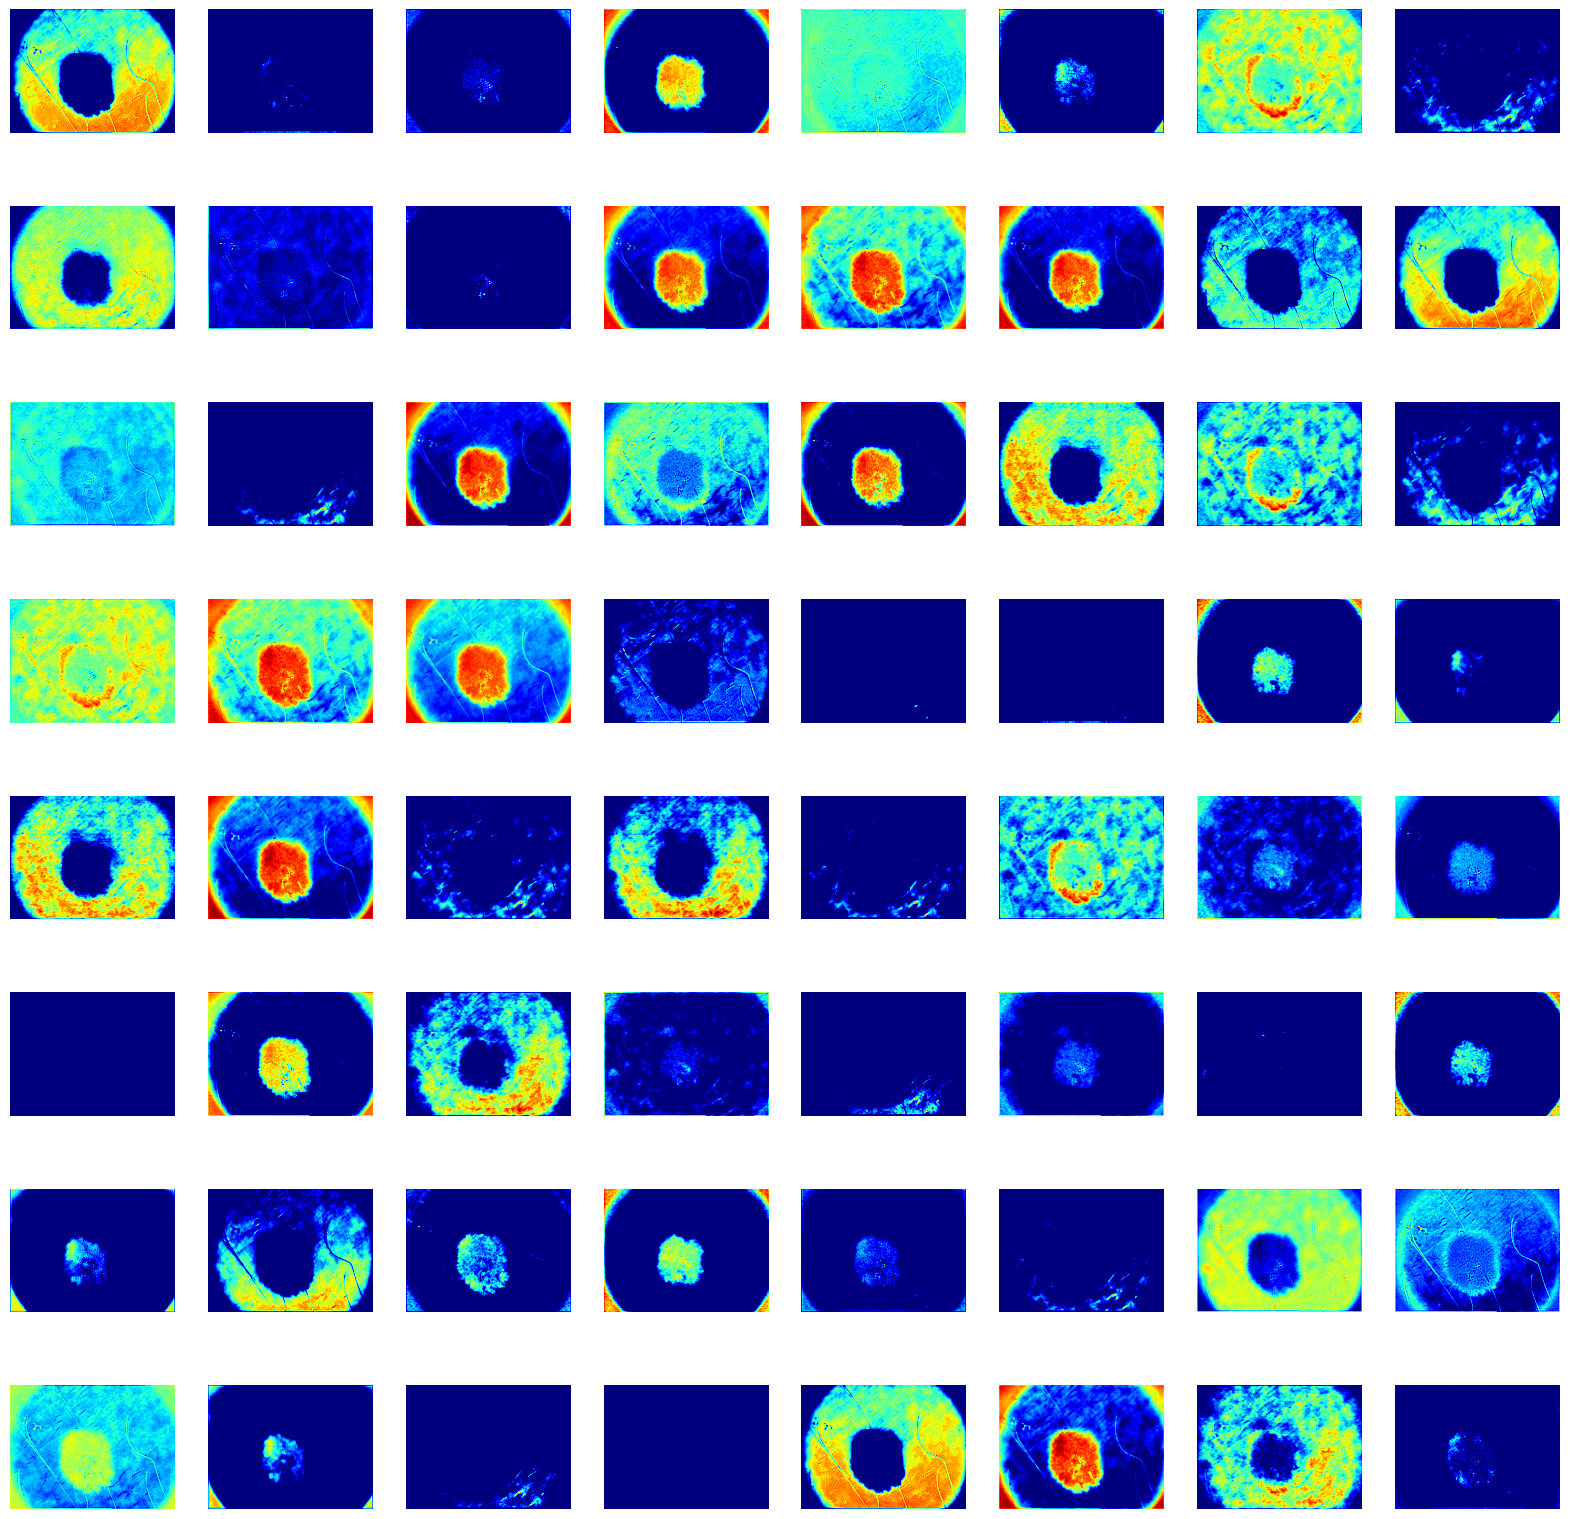

In [42]:
print("Convolutional block 5")
in_to_intermediate = Model(inputs=input_inter, outputs=attention_blocks[4])
int_out = in_to_intermediate.predict(test_img_input)
visualize_conv_layer(int_out,8,8)